In [1]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


### Importing necessary libraries

In [2]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 9.1 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
import string

In [4]:
import numpy as np
import pandas as pd
from random import choice, sample
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
from sklearn.pipeline import Pipeline
import spacy

from collections import Counter
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings("ignore")


from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

### Loading dataset

In [5]:
data = pd.read_csv(r"C:\Users\HP\Downloads\archive (2)\webmd.csv")

In [6]:
data

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


### Adding name and race columns

In [7]:
pip install mimesis

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Name:

from mimesis import Person
person = Person('en')

# function to create names to exact rows
def fake_names(n):
   name = []
   for _ in range(0, n):
        name.append(person.name())
   return name

names = fake_names(362806)

data_name = pd.DataFrame(list(zip(names)),columns = ['Name'])

data_name.head(10)

,Name
0,Alita
1,Buford
2,Stanford
3,Amira
4,Meg
5,Cory
6,Alex
7,Lincoln
8,Luther
9,Tamatha


In [9]:
# Race:

import random

options = [("White", 0.32), ("Hispanic", 0.28), ("Black", 0.22), ("Asian", 0.18)]
words = []

for i in range(362806):
    word = random.choices([o[0] for o in options], [o[1] for o in options])[0]
    words.append(word)

data_race=pd.DataFrame(words, columns = ['Race'])

data_race.head(10)

,Race
0,Black
1,Hispanic
2,Black
3,Asian
4,Black
5,White
6,Black
7,White
8,Hispanic
9,White


In [10]:
df = pd.concat([data_name, data_race, data], axis=1).reindex(data.index)
df.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Alita,Black,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Buford,Hispanic,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Stanford,Black,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Amira,Asian,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Meg,Black,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


Here Is the final dataset , let's do some basic analysis on it

In [11]:
df.shape

(362806, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Name           362806 non-null  object
 1   Race           362806 non-null  object
 2   Age            362806 non-null  object
 3   Condition      362806 non-null  object
 4   Date           362806 non-null  object
 5   Drug           362806 non-null  object
 6   DrugId         362806 non-null  int64 
 7   EaseofUse      362806 non-null  int64 
 8   Effectiveness  362806 non-null  int64 
 9   Reviews        362769 non-null  object
 10  Satisfaction   362806 non-null  int64 
 11  Sex            362806 non-null  object
 12  Sides          362806 non-null  object
 13  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 38.8+ MB


In [13]:
df.columns

Index(['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [14]:
df.nunique()

Name               3323
Race                  4
Age                  12
Condition          1806
Date               4524
Drug               7093
DrugId             6572
EaseofUse             7
Effectiveness         7
Reviews          250167
Satisfaction          7
Sex                   3
Sides              1651
UsefulCount         148
dtype: int64

## EDA 

#### Top 20 drugs based on number of users

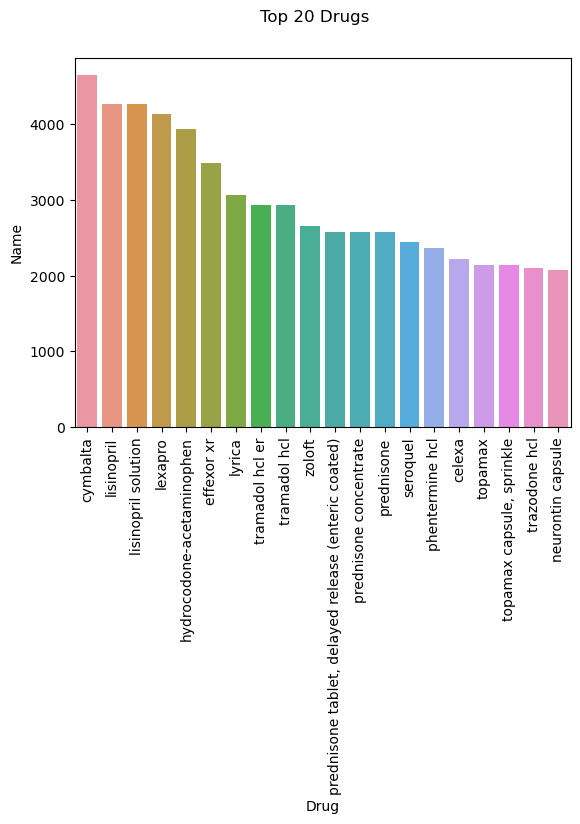

In [15]:
data_= df['Drug'].value_counts().head(20).reset_index()
data_.columns = ['Drug', 'Name']
sns.barplot(data=data_, x = 'Drug', y = 'Name')
plt.suptitle("Top 20 Drugs")
plt.xticks(rotation=90,fontsize=10)
plt.show()

Cymbalta tops the list followed by Lisinopril. It is to be noted that all the 20 drugs has been used by more than atleast 2000 people 

#### Top 20 conditions

Text(0, 0.5, 'Users')

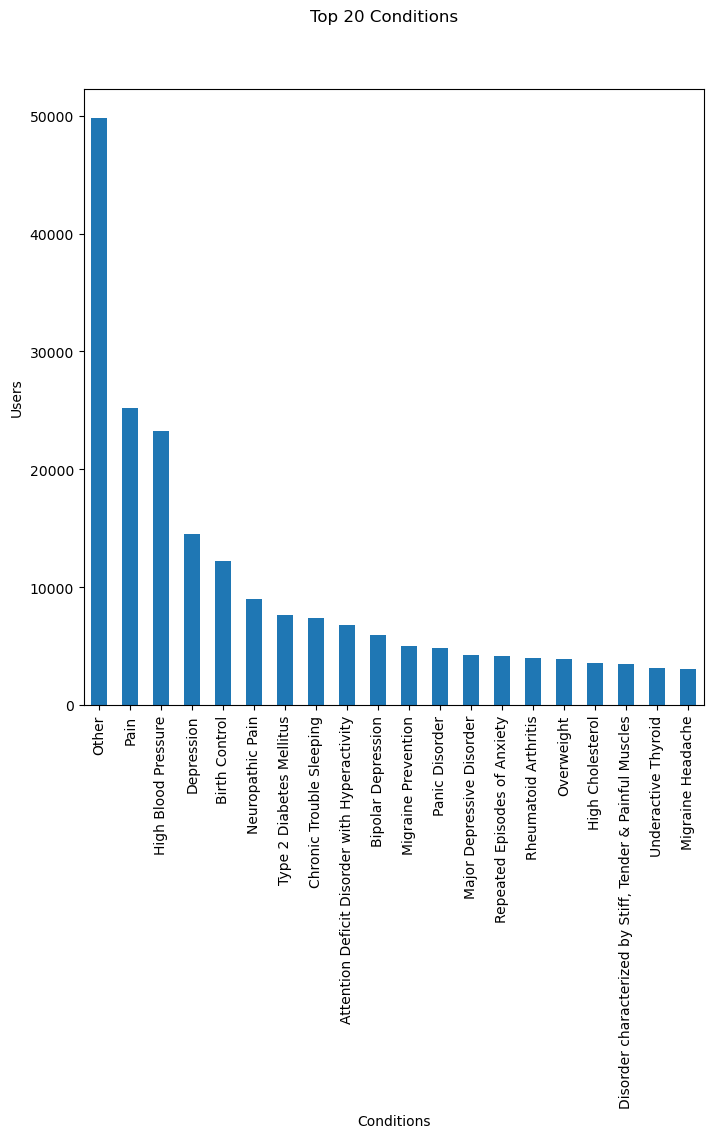

In [16]:
df['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(8,8))
plt.suptitle("Top 20 Conditions")
plt.xlabel('Conditions')
plt.ylabel('Users')

As much as 50,000 users have reported other conditions followed by Pain topped the list with more than 25000 people reporting it.

#### Users by gender

### A drug named cymbalta with DrugId 91491 is selected in building a classification model to determine side effects

In [19]:
df2 = df[df.Drug=='cymbalta']

In [20]:
df2

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
314212,Agnus,Black,,Major Depressive Disorder,2/29/2020,cymbalta,91491,5,5,No Script or health Insurance needed to place ...,5,,"Nausea , dry mouth , constipation , loss of ...",12
314216,Linh,Black,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,91491,3,1,I was prescribed Cymbalta for anxiety and star...,1,Male,"Nausea , dry mouth , constipation , loss of ...",0
314223,Kirstie,Black,45-54,Anxiousness associated with Depression,1/4/2020,cymbalta,91491,5,5,Switched from Effexor to this medicine after 1...,5,,"Nausea , dry mouth , constipation , loss of ...",0
314235,Delaine,Hispanic,35-44,Anxiousness associated with Depression,12/6/2019,cymbalta,91491,3,3,Bipolar I with a neck fusion. Pdoc prescribed ...,2,Female,"Nausea , dry mouth , constipation , loss of ...",0
314246,Nakesha,White,55-64,Chronic Muscle or Bone Pain,11/20/2019,cymbalta,91491,2,2,"I have depression, anxiety, Fibro, severe musc...",2,,"Nausea , dry mouth , constipation , loss of ...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319081,Ivan,Black,35-44,Major Depressive Disorder,7/18/2008,cymbalta,91491,5,5,"taking 60 mg daily for almost 2 yrs, works ver...",5,Female,"Nausea , dry mouth , constipation , loss of ...",6
319082,Neely,White,35-44,Major Depressive Disorder,7/17/2008,cymbalta,91491,5,3,Do Not stop taking this drug without consultin...,2,Female,"Nausea , dry mouth , constipation , loss of ...",9
319083,Gayle,White,25-34,Neuropathic Pain,7/17/2008,cymbalta,91491,4,4,,4,Female,"Nausea , dry mouth , constipation , loss of ...",2
319084,Rich,Black,55-64,Major Depressive Disorder,7/17/2008,cymbalta,91491,4,4,"I started out on 30, then 60, then 90 mg of Cy...",3,Female,"Nausea , dry mouth , constipation , loss of ...",6


In [21]:
df2.shape

(4648, 14)

In [22]:
df2.nunique()

Name             2382
Race                4
Age                11
Condition           8
Date             2189
Drug                1
DrugId              1
EaseofUse           5
Effectiveness       5
Reviews          4141
Satisfaction        5
Sex                 3
Sides               1
UsefulCount        69
dtype: int64

In [23]:
df2.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [24]:
# Handling instances with whitespaces
for i in df2:
    df2[i]=np.where(df2[i]==" ",np.NAN,df2[i])
    
df2.isna().sum()

Name               0
Race               0
Age              118
Condition          0
Date               0
Drug               0
DrugId             0
EaseofUse          0
Effectiveness      0
Reviews          502
Satisfaction       0
Sex              197
Sides              0
UsefulCount        0
dtype: int64

In [25]:
df2.dropna(axis=0, inplace = True)
df2.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [26]:
# Handling instances with double whitespaces
for i in df2:
    df2[i]=np.where(df2[i]=="  ",np.NAN,df2[i])
    
df2.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

### Checking each column value

### Date

In [27]:
df2['Year'] = pd.to_datetime(df2['Date'], errors='coerce').dt.year
df2['Month'] = pd.to_datetime(df2['Date'], errors='coerce').dt.month
df2['day_of_week'] = pd.to_datetime(df2['Date'], errors='coerce').dt.day_name()

In [28]:
df2.head(5)

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year,Month,day_of_week
314216,Linh,Black,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,91491.0,3.0,1.0,I was prescribed Cymbalta for anxiety and star...,1.0,Male,"Nausea , dry mouth , constipation , loss of ...",0.0,2020,1,Monday
314235,Delaine,Hispanic,35-44,Anxiousness associated with Depression,12/6/2019,cymbalta,91491.0,3.0,3.0,Bipolar I with a neck fusion. Pdoc prescribed ...,2.0,Female,"Nausea , dry mouth , constipation , loss of ...",0.0,2019,12,Friday
314267,Wade,Black,45-54,Chronic Muscle or Bone Pain,11/9/2019,cymbalta,91491.0,5.0,4.0,I have only had one 30mg and so far i noticed ...,4.0,Female,"Nausea , dry mouth , constipation , loss of ...",0.0,2019,11,Saturday
314305,Gala,Black,55-64,Chronic Muscle or Bone Pain,9/18/2019,cymbalta,91491.0,5.0,4.0,The biggest problem was impotency from this pi...,4.0,Male,"Nausea , dry mouth , constipation , loss of ...",0.0,2019,9,Wednesday
314323,Nelson,Black,75 or over,Chronic Muscle or Bone Pain,8/13/2019,cymbalta,91491.0,5.0,5.0,I had extreme fatigue and muscle pain. Felt li...,5.0,Female,"Nausea , dry mouth , constipation , loss of ...",1.0,2019,8,Tuesday


4.960279428797154

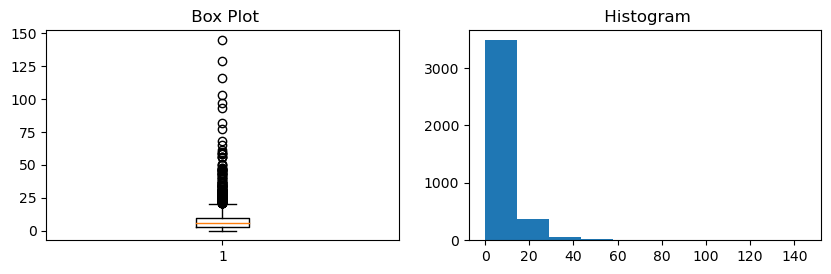

In [29]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(df2["UsefulCount"])
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(df2["UsefulCount"])
plt.title(" Histogram")
df2.UsefulCount.skew()

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

0.2111201584632865

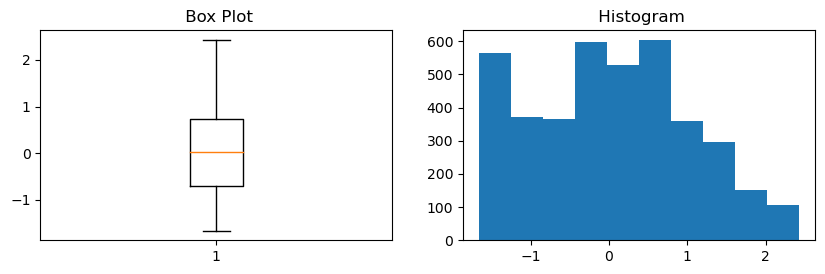

In [31]:
data_Usefulcount = pd.DataFrame(df2['UsefulCount'])

scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data_Usefulcount1 = pipeline.fit_transform(data_Usefulcount)

plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data_Usefulcount1)
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(data_Usefulcount1)
plt.title(" Histogram")

df2['UsefulCount_boxcox'] = data_Usefulcount1
df2['UsefulCount_boxcox'].skew()

-1.2543604666075072

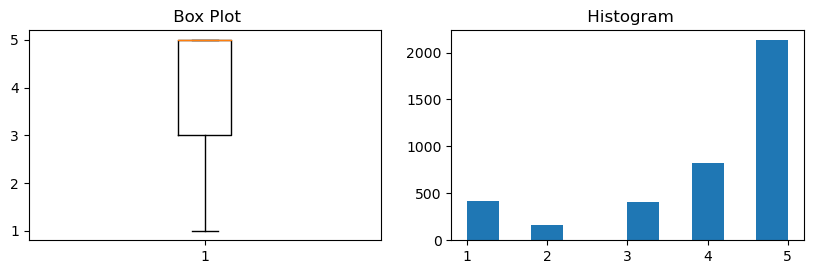

In [32]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(df2["EaseofUse"])
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(df2["EaseofUse"])
plt.title(" Histogram")
df2.EaseofUse.skew()

-0.5971279022430935

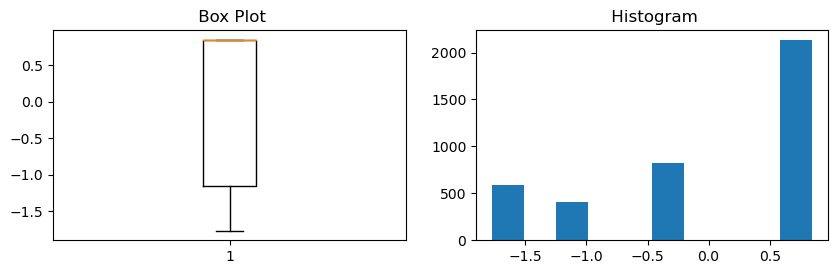

In [33]:
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])

data_EaseofUse = pd.DataFrame(df2['EaseofUse'])
data_EaseofUse1 = pipeline.fit_transform(data_EaseofUse)

plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data_EaseofUse1)
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(data_EaseofUse1)
plt.title(" Histogram")

df2['EaseofUse_boxcox'] = data_EaseofUse1
df2.EaseofUse_boxcox.skew()

0.013023655447446417

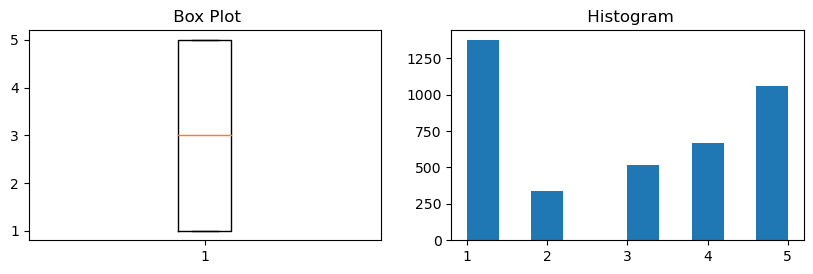

In [34]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(df2["Satisfaction"])
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(df2["Satisfaction"])
plt.title(" Histogram")
df2.Satisfaction.skew()

-0.3690957854279425

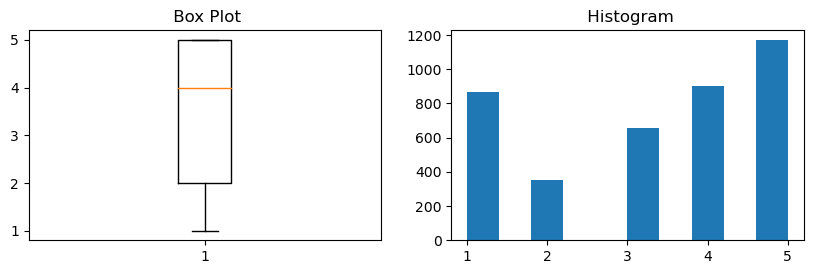

In [35]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(df2["Effectiveness"])
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(df2["Effectiveness"])
plt.title(" Histogram")
df2.Effectiveness.skew()

In [36]:
# new feature creation: Side effect 
mapping = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}
df2['Sideeffect'] = df2['Satisfaction'].map(mapping)
# df2.loc[df2['Satisfaction'] == 1, 'Sideeffect'] = df2.loc[df2['Satisfaction'] == 1,5, 'Sideeffect']

In [37]:
df2.columns

Index(['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Year', 'Month', 'day_of_week', 'UsefulCount_boxcox',
       'EaseofUse_boxcox', 'Sideeffect'],
      dtype='object')

### EDA on Cymbalta 

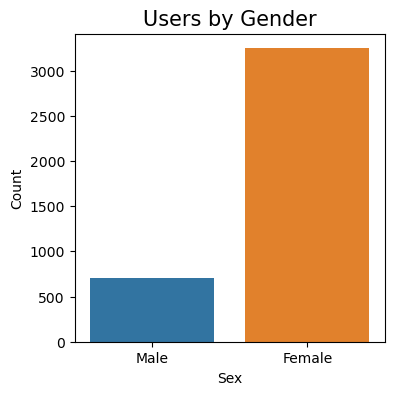

In [38]:
plt.figure(figsize = (4,4))
s=sns.countplot(x='Sex', data=df2)
plt.title('Users by Gender', fontsize=15)
plt.xlabel('Sex')
plt.ylabel('Count') 
plt.show()

Female users are predominant

Text(0, 0.5, 'Count')

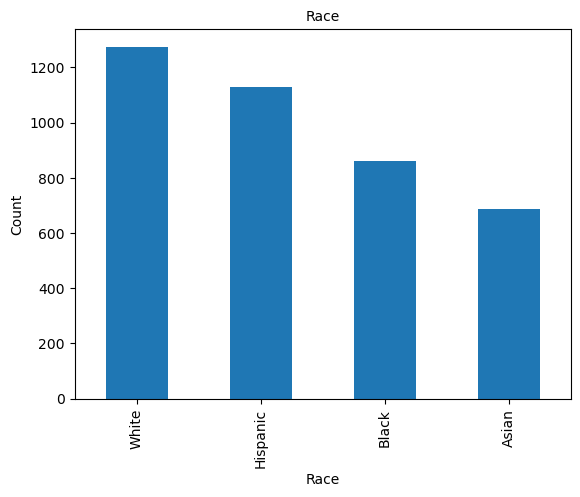

In [39]:
df2['Race'].value_counts().plot(kind='bar')
plt.title("Race", fontsize = 10)
plt.xlabel("Race", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

Text(0.5, 1.0, 'Users by Race and Gender')

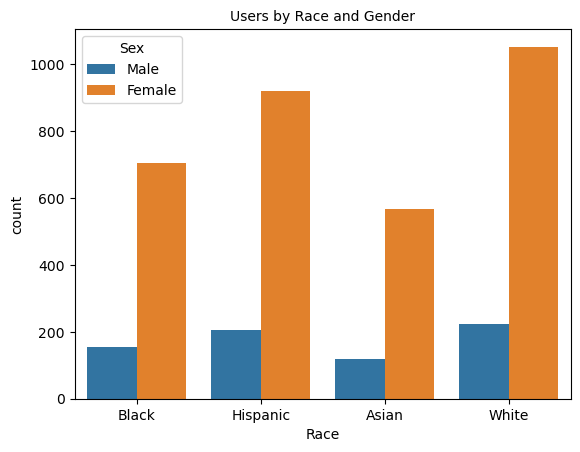

In [40]:
sns.countplot(x='Race',hue='Sex',data=df2)
plt.title("Users by Race and Gender", fontsize = 10)

In each race, female gender is the predominant user

Text(0.5, 1.0, 'Users by Age and Gender')

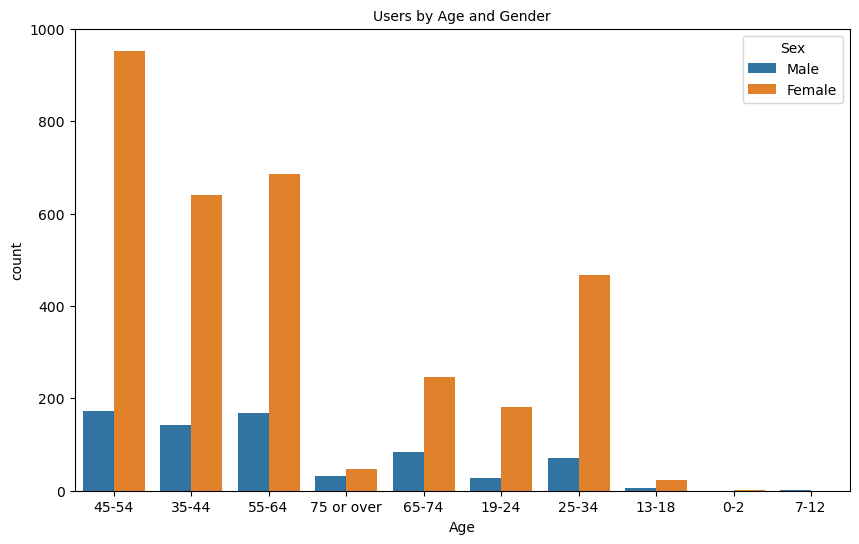

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sex',data=df2)
plt.title("Users by Age and Gender", fontsize = 10)

Text(0, 0.5, 'Count of Reviews')

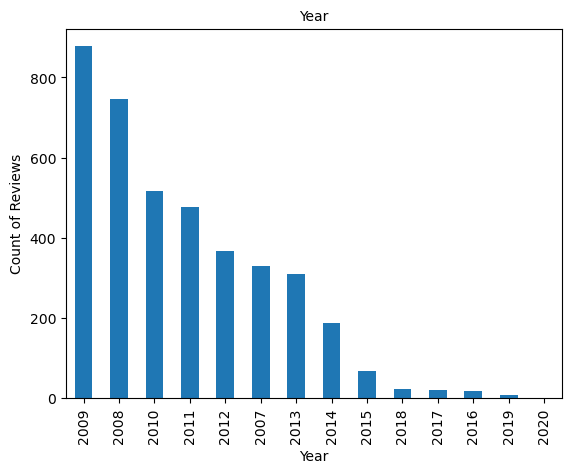

In [42]:
df2['Year'].value_counts().plot(kind='bar')
plt.title("Year", fontsize = 10)
plt.xlabel("Year", fontsize = 10)
plt.ylabel("Count of Reviews", fontsize = 10)

In each year, there is a gradual decrease in user reviews

Text(0, 0.5, 'Count')

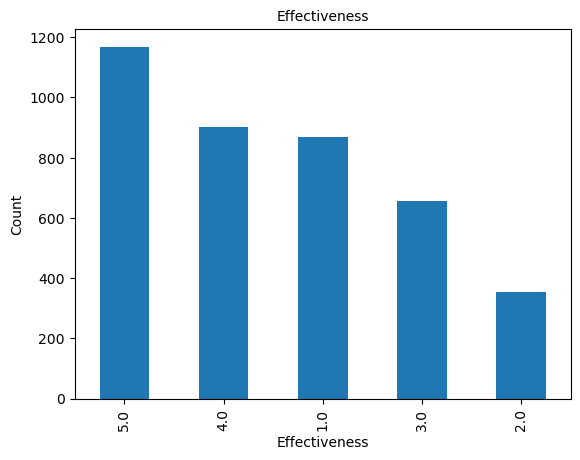

In [43]:
df2['Effectiveness'].value_counts().plot(kind='bar')
plt.title("Effectiveness", fontsize = 10)
plt.xlabel("Effectiveness", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

The drug is fairly effective with around 1600 users voting a 4 rating to it.

<Figure size 1000x800 with 0 Axes>

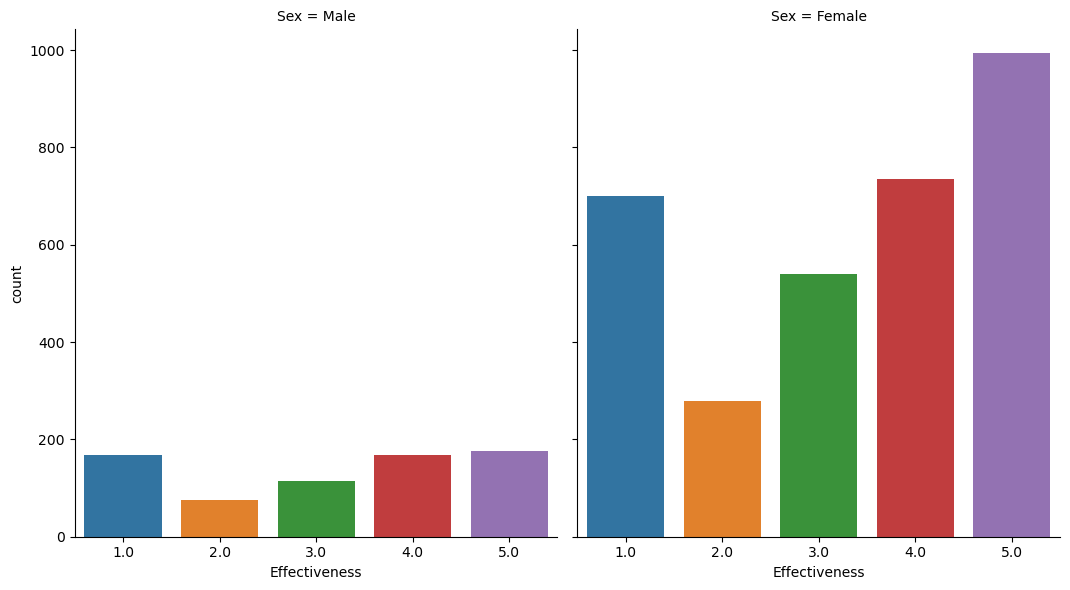

In [44]:
plt.figure(figsize=(10,8))
g = sns.catplot(x="Effectiveness",col="Sex",
                data=df2, kind="count",
                height=6,aspect =.9);

Both the users have given a mixed response

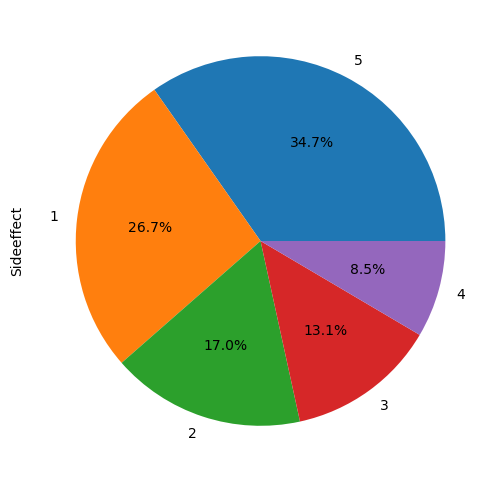

In [45]:
plt.figure(figsize=(6,6))
df2['Sideeffect'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

34.7% users reported extreme sideeffects with 1 being no side effect and 5 being extreme side effect

<Axes: xlabel='Age', ylabel='count'>

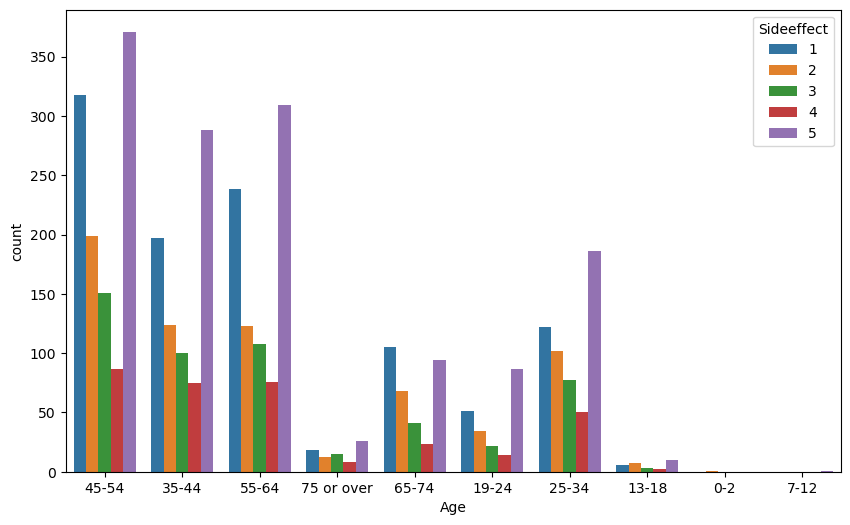

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sideeffect',data=df2)

45-54 age group has opinionated that they had extreme side effects

<Figure size 2000x1000 with 0 Axes>

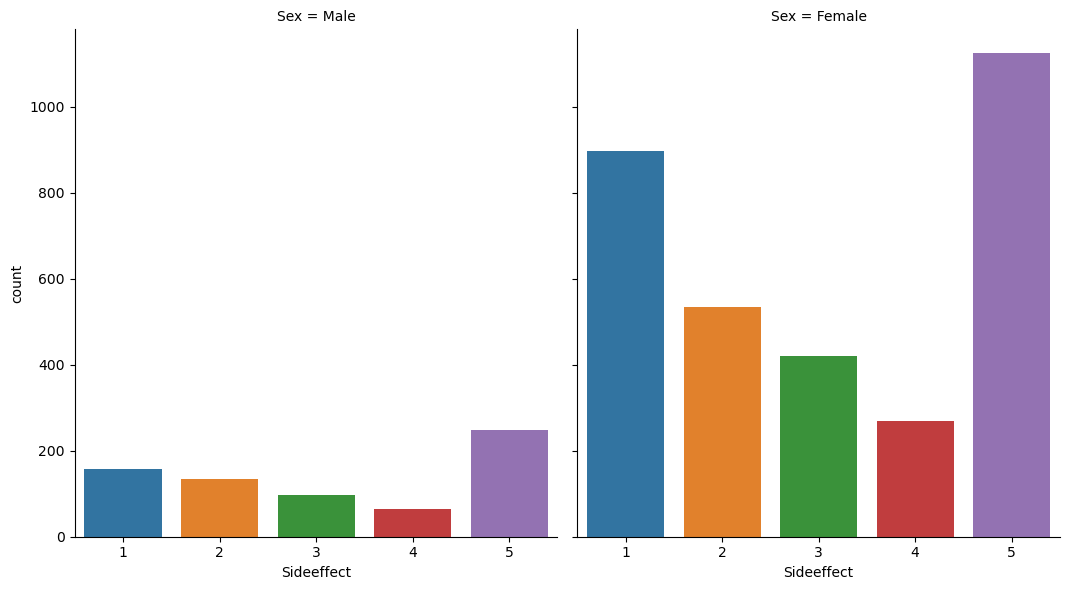

In [47]:
plt.figure(figsize=(20,10))

g = sns.catplot(x="Sideeffect",col="Sex",data=df2, kind="count",height=6,aspect =.9);

Female users have reported more extreme side effects

<Axes: xlabel='Race', ylabel='count'>

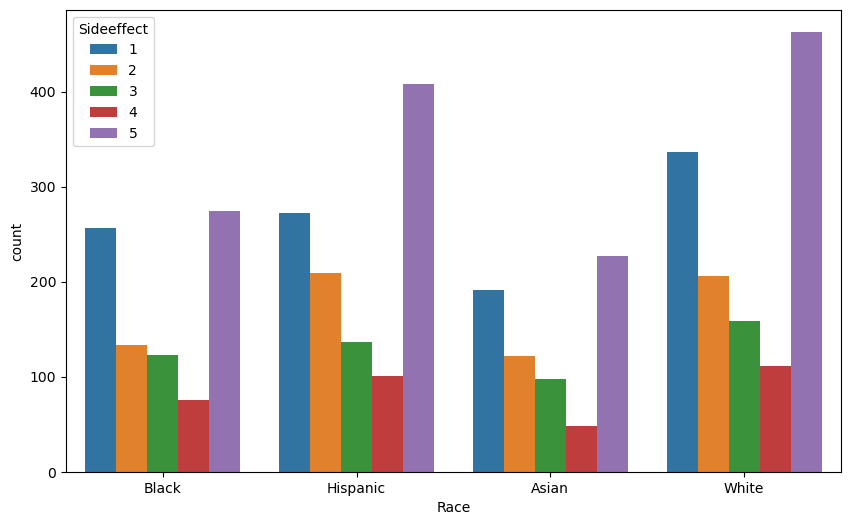

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Race',hue='Sideeffect',data=df2)

White and Hispanic users reported more extreme side effects

## Review

In [49]:
df2.Reviews.sample(5)

317077              severe mood swings n behavior problems 
318540    This medicine is a miracle for me.  I am happy...
318511    I have always been depressed but have been abl...
317287    I felt very uncomfortable on this drug.  I sto...
318841    Cymbalta works very well for me, except now th...
Name: Reviews, dtype: object

Let us define a function to clean the text in the review so as to generate meaningfull output. The plan is to rank the reviews as either positive or negative. But, so as to rank the reviews, we need a more samples than what we have here. So, we will train the algoithm on the complete parent dataset (containing data about all the medicines). The algorithm will get trained on satisfaction and reviews, which means, it will identify which reviews or specifically word consitutes positive review ( satisfaction > 3) and which one consitute negative reviews (satisfaction < 3). Then, the generated model will be used to generate review rank ( 1 for positve and 0 for negative) for us in our dataset. Kindly note, the review rank for entries where satisfaction > 3 is 1 and for satisfaction < 3 is 0. The entries with satisfaction == 3 will be fed to the model to generate review rank values. Finally, our dataset will be complete after this.

## Cleaning the Global Review column

In [50]:
if data['Reviews'].dtype.kind == "O":
        data['Reviews'] = data['Reviews'].str.strip()

In [51]:
data['Reviews']= data['Reviews'].astype(str)

In [52]:
import nltk
nltk.download('stopwords')



nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])
STOPWORDS = set(sklearn_stop_words).union(set(stopwords.words("english")))

def clean_review(text, STOPWORDS=STOPWORDS, nlp=nlp):
    """Cleans up text"""
    
    def rep_emo(text, placeholder_pos=' happyemoticon ', placeholder_neg=' sademoticon '):
        """Replace emoticons"""
        # Credit https://github.com/shaheen-syed/Twitter-Sentiment-Analysis/blob/master/helper_functions.py
        emoticons_pos = [":)", ":-)", ":p", ":-p", ":P", ":-P", ":D",":-D", ":]", ":-]", ";)", ";-)",
                         ";p", ";-p", ";P", ";-P", ";D", ";-D", ";]", ";-]", "=)", "=-)", "<3"]
        emoticons_neg = [":o", ":-o", ":O", ":-O", ":(", ":-(", ":c", ":-c", ":C", ":-C", ":[", ":-[",
                         ":/", ":-/", ":\\", ":-\\", ":n", ":-n", ":u", ":-u", "=(", "=-(", ":$", ":-$"]

        for e in emoticons_pos:
            text = text.replace(e, placeholder_pos)

        for e in emoticons_neg:
            text = text.replace(e, placeholder_neg)   
        return text

    def rep_punct(text):
        """Replace all punctuation with space"""
        for c in string.punctuation:
            text = text.replace(c, " ")
        return text

    def rem_stop_num(text):
        """Remove stop words and anything starting with number"""
        return " ".join(word for word in text.split() if word not in STOPWORDS and not word[0].isdigit())

    def lemmatize(text):
        """Return lemmas of tokens in text"""
        return " ".join(tok.lemma_.lower().strip() for tok in nlp(text) if tok.lemma_ != "-PRON-")  

    return lemmatize(rem_stop_num(rep_punct(rep_emo(text))))

mldf = data[["Satisfaction", "Reviews"]]
mldf["Reviews"] = mldf["Reviews"].apply(clean_review)

# remove any rows with new empty strings following the clean-up
mldf["Reviews"].replace("", np.nan, inplace=True)
mldf.dropna(inplace=True)
# adding indexes as "index" column for later use to recreate same splits 
mldf.reset_index(inplace=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Review column is cleaned. A new column satisfaction1 is generated which will help in identifiying postive and negative reviews for algorithm where 0 is negative, 2 is positive and 1 is neutral for satisfaction < 3, > 3 and ==3 respectively. We will omit the neutral reviews.

In [53]:
def relabel(x):
    return 0 if x < 3 else 1 if x == 3 else 2

mldf["Satisfaction1"] = mldf["Satisfaction"].apply(relabel)

In [54]:
mldf

,index,Satisfaction,Reviews,Satisfaction1
0,0,5,i retire physician med i try allergy seasonal ...,2
1,1,5,clear right throat hurt go away take medicine,2
2,2,3,ptinr normal,1
3,3,1,falling and don t realise it,0
4,4,1,my grandfather prescribe medication coumadin a...,0
...,...,...,...,...
320748,362801,5,i take week i stop drug soon think week i weir...,2
320749,362802,1,my dad strate take chantix month ago fine stop...,0
320750,362803,2,as long i chantix i smoke terrible stomach ups...,0
320751,362804,5,start medication oct haven smoke week planning...,2


### Generating Text Processing Model

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
train_set, test_set = train_test_split(mldf, test_size=0.25, random_state=0, stratify=mldf["Satisfaction1"])
train_index = train_set.index
test_index = test_set.index
print(train_set.shape)
print(test_set.shape)

(240564, 4)
(80189, 4)


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [58]:
%%time
train_set = train_set[train_set["Satisfaction1"] != 1]
test_set = test_set[test_set["Satisfaction1"] != 1]
print(train_set.shape)
print(test_set.shape)

vectorizer = TfidfVectorizer(max_features=2500, min_df=10, max_df=0.8)
X_train = vectorizer.fit_transform(train_set["Reviews"]).toarray()
X_test = vectorizer.transform(test_set["Reviews"]).toarray()
y_train = train_set["Satisfaction1"].values
y_test = test_set["Satisfaction1"].values

model = RandomForestClassifier(min_samples_split=6, random_state=0)
model.fit(X_train, y_train)

acc_train = accuracy_score(y_train, model.predict(X_train))
print(f"\nAccuracy in train set: {acc_train:.2}")
predictions = model.predict(X_test)
acc_test = accuracy_score(y_test, predictions)
print(f"\nAccuracy in test  set: {acc_test:.2}\n")
print(classification_report(y_test, predictions))

(207859, 4)
(69287, 4)

Accuracy in train set: 0.99

Accuracy in test  set: 0.83

              precision    recall  f1-score   support

           0       0.83      0.80      0.82     32110
           2       0.83      0.86      0.85     37177

    accuracy                           0.83     69287
   macro avg       0.83      0.83      0.83     69287
weighted avg       0.83      0.83      0.83     69287

CPU times: total: 16min 37s
Wall time: 22min 52s


We got an accuracy of 83%.

Let us the clean the review specific to our drug

In [59]:
df2["Reviews"] = df2["Reviews"].apply(clean_review)

Let us the rank the reviews by creating a function for the same

In [60]:
def predict_rank(text):
    cleaned_text = [clean_review(text)]
    padded_text = vectorizer.transform(cleaned_text)
    p = model.predict(padded_text)[0]
    if (p == 0):
        return 0
    else :
        return 1
    
def predict_rank1(rank):
    if (rank < 3):
        return 0
    else:
        return 1
    
# predict_rank("I loved it")
df2['Reviews_Rank'] = df2['Satisfaction']
df2.loc[df2['Satisfaction'] < 3, 'Reviews_Rank'] = df2.loc[df2['Satisfaction'] < 3, 'Reviews_Rank'].apply(predict_rank1)
df2.loc[df2['Satisfaction'] > 3, 'Reviews_Rank'] = df2.loc[df2['Satisfaction'] > 3, 'Reviews_Rank'].apply(predict_rank1)
df2.loc[df2['Satisfaction'] == 3, 'Reviews_Rank'] = df2.loc[df2['Satisfaction'] == 3, 'Reviews'].apply(predict_rank)
df2['Reviews_Rank'].unique()

array([0., 1.])

Columns Name has unique values so will be dropped. Drug, DrugId, Condition, Date, Easeofuse, usefulcount, sides, Year will be dropped. Race, Sex, Year, Month, Dayofweek will be onehot encoded. Satisfaction will be segregated based on the values as nil, mild, moderate, sever, extreme based on values of 5, 4, 3, 2, 1 respectively. The assumption being that thet satisfaction is a parameter that gets affected by side effects in case of patients.

In [61]:
df2.drop(['Name','Condition','Date','Drug','DrugId','EaseofUse','Sides','UsefulCount'], axis=1, inplace = True)

In [62]:
df2.Month = df2.Month.astype(str)
df2.Year = df2.Year.astype(str)
data_encod = df2[['Race', 'Age','Sex','Month','day_of_week']]
data_num = df2[['Effectiveness']]
df2.columns

Index(['Race', 'Age', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex',
       'Year', 'Month', 'day_of_week', 'UsefulCount_boxcox',
       'EaseofUse_boxcox', 'Sideeffect', 'Reviews_Rank'],
      dtype='object')

## One Hot Encoding

In [63]:
data_encod = pd.get_dummies(data_encod)
data_encod

,Race_Asian,Race_Black,Race_Hispanic,Race_White,Age_0-2,Age_13-18,Age_19-24,Age_25-34,Age_35-44,Age_45-54,...,Month_7,Month_8,Month_9,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
314216,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
314235,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
314267,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
314305,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
314323,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319080,1,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
319081,0,1,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
319082,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
319084,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


## Standard Scaling

In [64]:
from sklearn.preprocessing import StandardScaler
mm = StandardScaler()
data_num = mm.fit_transform(data_num)
data_num = pd.DataFrame(data_num, columns = ['Effectiveness'])
data_num

,Effectiveness
0,-1.512045
1,-0.192327
2,0.467533
3,0.467533
4,1.127392
...,...
3944,-1.512045
3945,1.127392
3946,-0.192327
3947,0.467533


In [65]:
data3 = data_encod
data3['Effectiveness'] = data_num.values
data3

,Race_Asian,Race_Black,Race_Hispanic,Race_White,Age_0-2,Age_13-18,Age_19-24,Age_25-34,Age_35-44,Age_45-54,...,Month_8,Month_9,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,Effectiveness
314216,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,-1.512045
314235,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,-0.192327
314267,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0.467533
314305,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0.467533
314323,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1.127392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319080,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,-1.512045
319081,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1.127392
319082,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,-0.192327
319084,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.467533


So finally what I suppose is the following features which are race, age, review rank and effectiveness can form the dataset which will predict the sideeffect of the user.

In [67]:
data3 = data_encod
data3['Effectiveness'] = data_num.values
data3['Reviews_Rank'] = df2.Reviews_Rank
data3['UsefulCount_boxcox'] = data_Usefulcount1
data3['EaseofUse_boxcox'] = data_EaseofUse1
data3

,Race_Asian,Race_Black,Race_Hispanic,Race_White,Age_0-2,Age_13-18,Age_19-24,Age_25-34,Age_35-44,Age_45-54,...,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,Effectiveness,Reviews_Rank,UsefulCount_boxcox,EaseofUse_boxcox
314216,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,-1.512045,0.0,-1.660692,-1.156965
314235,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,-0.192327,0.0,-1.660692,-1.156965
314267,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0.467533,1.0,-1.660692,0.849923
314305,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.467533,1.0,-1.660692,0.849923
314323,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1.127392,1.0,-1.308212,0.849923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319080,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,-1.512045,0.0,1.103079,0.849923
319081,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1.127392,1.0,0.026063,0.849923
319082,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,-0.192327,0.0,0.572660,0.849923
319084,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.467533,1.0,0.026063,-0.405592


In [69]:
data4 = pd.DataFrame(df2['Sideeffect'])
data4

,Sideeffect
314216,5
314235,4
314267,2
314305,2
314323,1
...,...
319080,5
319081,1
319082,4
319084,3


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data3,data4,test_size=0.25, random_state = 42, stratify=data4)

## Log Regression

In [73]:
#log regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
# solver='lbfgs',max_iter=10000
model1 = log_reg.fit(X_train,Y_train)
Y_pred_logreg = model1.predict(X_test)

#metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
#print(confusion_matrix(Y_test,Y_pred_logreg))
print(accuracy_score(Y_test,Y_pred_logreg))

#CLassification Report
#from sklearn.metrics import classification_report
#report = classification_report(Y_test,Y_pred_logreg)
#print(report)

0.7165991902834008


## SVM Polynomial

In [74]:
#SVM polynomial
from sklearn.svm import SVC
svm_clf_p = SVC(kernel='poly', degree = 4, probability=True)
svm_model = svm_clf_p.fit(X_train, Y_train)
y_pred_svmp = svm_clf_p.predict(X_test)
# metrics
#print(confusion_matrix(Y_test, y_pred_svmp))
print(accuracy_score(Y_test, y_pred_svmp))

#CLassification Report
#from sklearn.metrics import classification_report
#report = classification_report(Y_test,y_pred_svmp)
#print(report)

0.7074898785425101


## SVM RBF

In [75]:
#SVM polynomial
from sklearn.svm import SVC
svm_clf_p = SVC(kernel='poly', degree = 4, probability=True)
svm_model = svm_clf_p.fit(X_train, Y_train)
y_pred_svmp = svm_clf_p.predict(X_test)
# metrics
#print(confusion_matrix(Y_test, y_pred_svmp))
print(accuracy_score(Y_test, y_pred_svmp))

#CLassification Report
#from sklearn.metrics import classification_report
#report = classification_report(Y_test,y_pred_svmp)
#print(report)

0.7074898785425101


## kNN

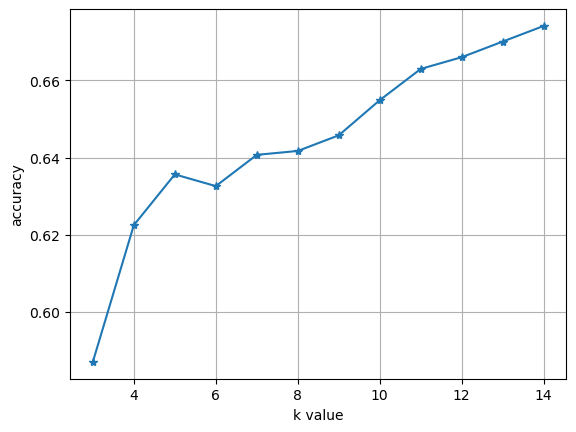

In [76]:
#knn
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbours = np.arange(3,15)

for k in neighbours:
        knn = KNeighborsClassifier(n_neighbors=k)
        model2 = knn.fit(X_train, Y_train)
        Y_pred_knn = model2.predict(X_test)
        acc=accuracy_score(Y_test,Y_pred_knn)
        metric_k.append(acc)
        
plt.plot(neighbours,metric_k,'*-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [78]:
knn = KNeighborsClassifier(n_neighbors=6)
model2 = knn.fit(X_train, Y_train)
Y_pred_knn = model2.predict(X_test)
# metrics
#print(confusion_matrix(Y_test,Y_pred_knn))
print(accuracy_score(Y_test,Y_pred_knn))


#CLassification Report
#from sklearn.metrics import classification_report
#report = classification_report(Y_test,Y_pred_knn)
#print(report)

0.6325910931174089


## Decision Tree

In [79]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dtm_clf = DecisionTreeClassifier(random_state = 42)
dtm_clf.fit(X_train, Y_train)
y_pred_dtm = dtm_clf.predict(X_test)
# metrics
#print(confusion_matrix(Y_test, y_pred_dtm))
print(accuracy_score(Y_test, y_pred_dtm))

#CLassification Report
#from sklearn.metrics import classification_report
#report = classification_report(Y_test,y_pred_dtm)
#print(report)

0.6427125506072875


## Random Forest

In [80]:
#random forest model
from sklearn.ensemble import RandomForestClassifier
rfm_clf = RandomForestClassifier(random_state = 42)
rfm_clf.fit(X_train, Y_train)
y_pred_rfm = rfm_clf.predict(X_test)
# metrics
#print(confusion_matrix(Y_test, y_pred_rfm))
print(accuracy_score(Y_test, y_pred_rfm))


#CLassification Report
#from sklearn.metrics import classification_report
#report = classification_report(Y_test,y_pred_rfm)
#print(report)

0.708502024291498


## Hyper Tuning Parameters

In [81]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [1, 10, 100], 'criterion': ['gini', 'entropy'], 'min_samples_leaf' : list(range(25, 100)), 'min_samples_split': [2, 3, 4], 'max_features': ['auto','log2']}
rfc_tuned = RandomForestClassifier()
model_tuning_RF = GridSearchCV(rfc_tuned, param_grid=params, verbose=1, cv=3, scoring = 'recall')
grid_rf_metrics = model_tuning_RF.fit(X_train, Y_train)

Fitting 3 folds for each of 2700 candidates, totalling 8100 fits


In [82]:
print("Best: %f using %s" % (grid_rf_metrics.best_score_, grid_rf_metrics.best_params_))

Best: nan using {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 25, 'min_samples_split': 2, 'n_estimators': 1}


In [84]:
y_pred_rfm = model_tuning_RF.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_rfm))
print(accuracy_score(Y_test, y_pred_rfm))


#CLassification Report
#from sklearn.metrics import classification_report
#report = classification_report(Y_test,y_pred_rfm)
#print(report)

[[224  39   1   0   0]
 [ 51 100  17   0   0]
 [ 13  23  63   0  30]
 [  0   5  18   0  61]
 [  0   1  20   0 322]]
0.7176113360323887


## Ridge Classifier

In [85]:
from sklearn.linear_model import RidgeClassifier
rid_clf = RidgeClassifier()
rid_clf.fit(X_train, Y_train)
y_pred_rid = rid_clf.predict(X_test)
# metrics
#print(confusion_matrix(Y_test, y_pred_rid))
print(accuracy_score(Y_test, y_pred_rid))


#CLassification Report
#from sklearn.metrics import classification_report
#report = classification_report(Y_test,y_pred_rid)
#print(report)

0.631578947368421


## Gradient Boosting Classifier

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
grd_clf = GradientBoostingClassifier()
grd_clf.fit(X_train, Y_train)
y_pred_grd = grd_clf.predict(X_test)
# metrics
#print(confusion_matrix(Y_test, y_pred_grd))
print(accuracy_score(Y_test, y_pred_grd))


#CLassification Report
#from sklearn.metrics import classification_report
#report = classification_report(Y_test,y_pred_grd)
#print(report)

0.7267206477732794
